Implement BA algorithm.

Node 0: degree = 11
Node 1: degree = 7
Node 2: degree = 6
Node 3: degree = 2
Node 4: degree = 5
Node 5: degree = 5
Node 6: degree = 3
Node 7: degree = 2
Node 8: degree = 3
Node 9: degree = 2
Node 10: degree = 6
Node 11: degree = 2
Node 12: degree = 3
Node 13: degree = 2
Node 14: degree = 3
Node 15: degree = 4
Node 16: degree = 2
Node 17: degree = 2
Node 18: degree = 2
Node 19: degree = 2


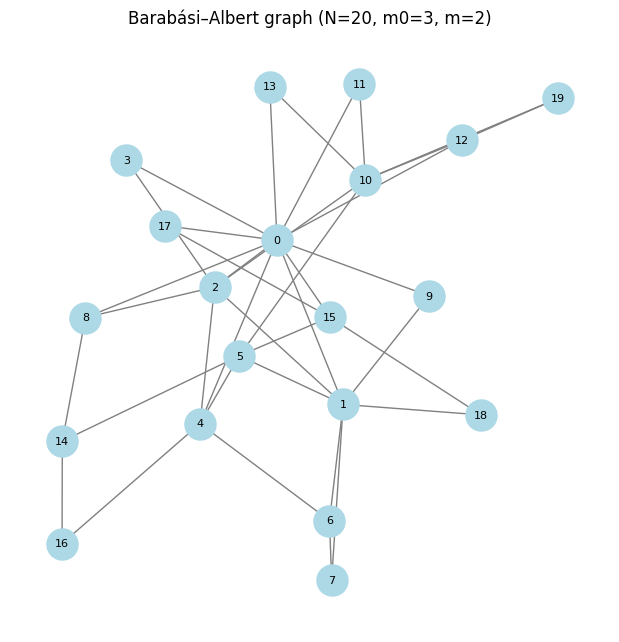

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt


def barabasi_albert_graph(N, m0=3, m=2, seed=None):
    if seed is not None:
        random.seed(seed)

    if m0 < 1:
        raise ValueError("m0 must be at least 1.")
    if m < 1 or m > m0:
        raise ValueError("m must satisfy 1 <= m <= m0.")
    if N <= m0:
        raise ValueError("N must be greater than m0.")

    # Start with a complete graph on m0 nodes
    graph = [set() for _ in range(N)]

    for i in range(m0):
        for j in range(i + 1, m0):
            graph[i].add(j)
            graph[j].add(i)

    # Prepare a list of nodes for preferential attachment
    degree_list = []
    for i in range(m0):
        degree_list.extend([i] * len(graph[i]))

    # Add new nodes one by one
    # (UWAGA: poprawna pętla to range(m0, N), a nie m0+1)
    for new_node in range(m0, N):
        if new_node < m0:
            continue  # pierwsze m0 już są w pełnym grafie

        targets = set()

        # Select m distinct existing nodes with probability ∝ degree
        while len(targets) < m:
            chosen = random.choice(degree_list)
            targets.add(chosen)

        # Add edges between new_node and each chosen target
        for t in targets:
            graph[new_node].add(t)
            graph[t].add(new_node)

        # update degree_list
        degree_list.extend([new_node] * m)
        for t in targets:
            degree_list.append(t)

    return graph


N = 20
m0 = 3
m = 2

G_list = barabasi_albert_graph(N, m0, m, seed=42)

degrees = [len(neighbors) for neighbors in G_list]
for i, deg in enumerate(degrees):
    print(f"Node {i}: degree = {deg}")


G_nx = nx.Graph()
G_nx.add_nodes_from(range(N))
for u, neighbors in enumerate(G_list):
    for v in neighbors:
        if u < v:
            G_nx.add_edge(u, v)

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G_nx, seed=0)

nx.draw(
    G_nx,
    pos,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=500,
    font_size=8,
)

plt.title("Barabási–Albert graph (N=20, m0=3, m=2)")
plt.axis("off")
plt.show()


Exercise 2.
Use it to create an animation of a growing graph.

C:\Users\kubog\Desktop\Social-Recomndation-Systems-Tasks\.venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


GIF saved as ba_growth.gif


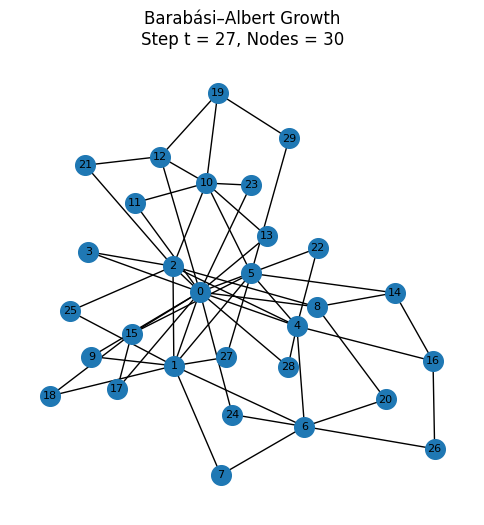

In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def barabasi_albert_graph(N, m0=3, m=2, seed=None, return_snapshots=False):

    if seed is not None:
        random.seed(seed)

    if m0 < 1:
        raise ValueError("m0 must be at least 1.")
    if m < 1 or m > m0:
        raise ValueError("m must satisfy 1 <= m <= m0.")
    if N <= m0:
        raise ValueError("N must be greater than m0.")

    graph = [set() for _ in range(N)]

    for i in range(m0):
        for j in range(i + 1, m0):
            graph[i].add(j)
            graph[j].add(i)

    degree_list = []
    for i in range(m0):
        degree_list.extend([i] * len(graph[i]))

    snapshots = []

    # convert adjacency list to NetworkX graph
    def to_nx_graph(current_n):
        G = nx.Graph()
        G.add_nodes_from(range(current_n))
        for u in range(current_n):
            for v in graph[u]:
                if v < current_n:
                    G.add_edge(u, v)
        return G

    # Save the initial snapshot
    if return_snapshots:
        snapshots.append(to_nx_graph(m0))

    # Add new nodes one by one
    for new_node in range(m0, N):

        # Choose m distinct existing nodes using preferential attachment
        targets = set()
        while len(targets) < m:
            selected = random.choice(degree_list)
            if selected != new_node:
                targets.add(selected)

        # Add edges
        for t in targets:
            graph[new_node].add(t)
            graph[t].add(new_node)

        # Update degree list
        degree_list.extend([new_node] * m)
        for t in targets:
            degree_list.append(t)

        # Save snapshot (up to new_node+1 nodes)
        if return_snapshots:
            snapshots.append(to_nx_graph(new_node + 1))

    if return_snapshots:
        return graph, snapshots

    return graph


# Model parameters
N = 30
m0 = 3
m = 2

# Generate graph + snapshots
graph, snapshots = barabasi_albert_graph(N, m0=m0, m=m, seed=42, return_snapshots=True)

# Layout of nodes (fixed positions for stability)
final_graph = snapshots[-1]
pos = nx.spring_layout(final_graph, seed=1)

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

def update(frame):
    ax.clear()
    G = snapshots[frame]
    nx.draw(
        G,
        pos=pos,
        ax=ax,
        with_labels=True,
        node_size=200,
        font_size=8
    )
    ax.set_title(f"Barabási–Albert Growth\nStep t = {frame}, Nodes = {G.number_of_nodes()}")

# Create animation
ani = FuncAnimation(
    fig,
    update,
    frames=len(snapshots),
    interval=500,
    repeat=False
)

ani.save("ba_growth.gif", writer="pillow", fps=2)
print("GIF saved as ba_growth.gif")

plt.show()


Exercise 3.
Plot the (averaged) histogram of the degree distribution at time t.

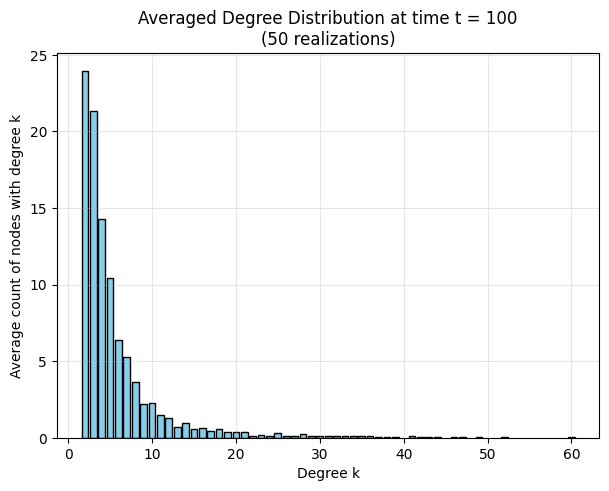

In [4]:
import matplotlib.pyplot as plt
from collections import Counter



def get_degree_distribution(graph):
    degrees = [len(neighbors) for neighbors in graph]
    return Counter(degrees)


N = 200        # final network size
t = 100        # time at which we inspect the degree distribution
m0 = 3
m = 2
realizations = 50   # how many independent networks to average over


all_degree_counts = Counter()

for _ in range(realizations):
    # Generate full graph
    graph = barabasi_albert_graph(N, m0=m0, m=m)

    # We only take degrees for nodes 0..t-1
    t_graph = graph[:t]

    # Get degree distribution at time t
    dist = get_degree_distribution(t_graph)

    all_degree_counts.update(dist)


# Average counts
for k in all_degree_counts:
    all_degree_counts[k] /= realizations


degrees = sorted(all_degree_counts.keys())
counts = [all_degree_counts[k] for k in degrees]

plt.figure(figsize=(7, 5))
plt.bar(degrees, counts, color='skyblue', edgecolor='black')
plt.xlabel("Degree k")
plt.ylabel("Average count of nodes with degree k")
plt.title(f"Averaged Degree Distribution at time t = {t}\n({realizations} realizations)")
plt.grid(alpha=0.3)

plt.show()


Exercise 4.
Find the α coefficient for the data from the previous tasks. Does it
agree with our theoretical result from the lecture?

In [5]:
import numpy as np

# Use only degrees >= 1
deg = np.array(degrees)
cnt = np.array(counts)

mask = deg > 0
deg = deg[mask]
cnt = cnt[mask]

# Log-transform
log_k = np.log(deg)
log_Pk = np.log(cnt)

# Linear least squares fit: log P(k) = a * log(k) + b
a, b = np.polyfit(log_k, log_Pk, 1)

alpha_estimated = -a

print("Estimated alpha =", alpha_estimated)
print("Theoretical BA result: alpha = 3")


Estimated alpha = 2.4498097463414186
Theoretical BA result: alpha = 3


Exercise 5.
Check with simulations relation ki(t). Compare the predictions of the
obtained formulas with the ”empirical” data from simpulations.

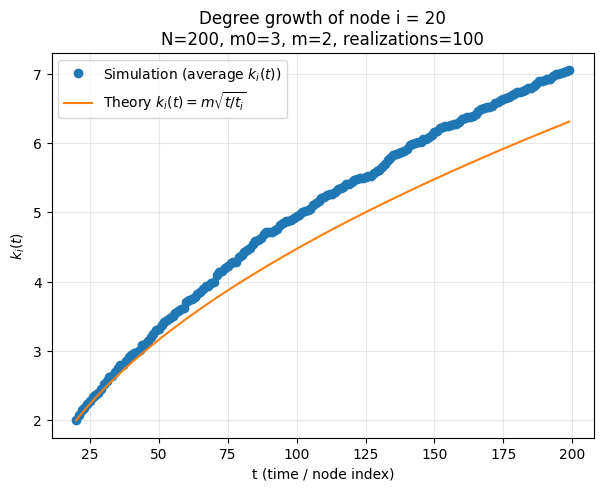

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt


def simulate_ki_vs_t(N=200, m0=3, m=2, node_i=10, realizations=50, seed=None):
    if seed is not None:
        random.seed(seed)

    if node_i >= N:
        raise ValueError("node_i must be < N")
    if node_i < m0:
        raise ValueError("For simplicity, choose node_i >= m0 (a 'new' node).")

    # observe times t = node_i, ..., N-1
    num_points = N - node_i
    sum_degrees = np.zeros(num_points, dtype=float)

    for r in range(realizations):
        # adjacency list
        graph = [set() for _ in range(N)]

        # Initial complete graph on nodes 0..m0-1
        for i in range(m0):
            for j in range(i + 1, m0):
                graph[i].add(j)
                graph[j].add(i)

        # Degree list for preferential attachment
        degree_list = []
        for i in range(m0):
            degree_list.extend([i] * len(graph[i]))

        # Grow the network
        for new_node in range(m0, N):
            # Select m distinct existing nodes with prob ∝ degree
            targets = set()
            while len(targets) < m:
                chosen = random.choice(degree_list)   # ← choose from degree_list, not graph[new_node]
                if chosen != new_node:
                    targets.add(chosen)

            # Add edges
            for t_node in targets:
                graph[new_node].add(t_node)
                graph[t_node].add(new_node)

            # Update degree list
            degree_list.extend([new_node] * m)
            for t_node in targets:
                degree_list.append(t_node)

            # After adding node `new_node`, current "time" is t = new_node
            if new_node >= node_i:
                idx = new_node - node_i   # index in sum_degrees
                sum_degrees[idx] += len(graph[node_i])

    # Average over realizations  (must be OUTSIDE the for r loop)
    avg_degrees = sum_degrees / realizations

    t_values = np.arange(node_i, N)

    # Theoretical prediction: k_i(t) = m * sqrt(t / t_i)
    t_i = node_i
    k_theory = m * np.sqrt(t_values / t_i)

    return t_values, avg_degrees, k_theory


N = 200
m0 = 3
m = 2
node_i = 20
realizations = 100

t_vals, k_avg, k_th = simulate_ki_vs_t(
    N=N,
    m0=m0,
    m=m,
    node_i=node_i,
    realizations=realizations,
    seed=42
)

plt.figure(figsize=(7, 5))

# simulation: points
plt.plot(t_vals, k_avg, "o", label="Simulation (average $k_i(t)$)")

# theory: smooth line
plt.plot(t_vals, k_th, "-", label=r"Theory $k_i(t) = m \sqrt{t / t_i}$")

plt.xlabel("t (time / node index)")
plt.ylabel(r"$k_i(t)$")
plt.title(f"Degree growth of node i = {node_i}\nN={N}, m0={m0}, m={m}, realizations={realizations}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


P6.3 Check with simulations result obtained for model A. [1.5P]

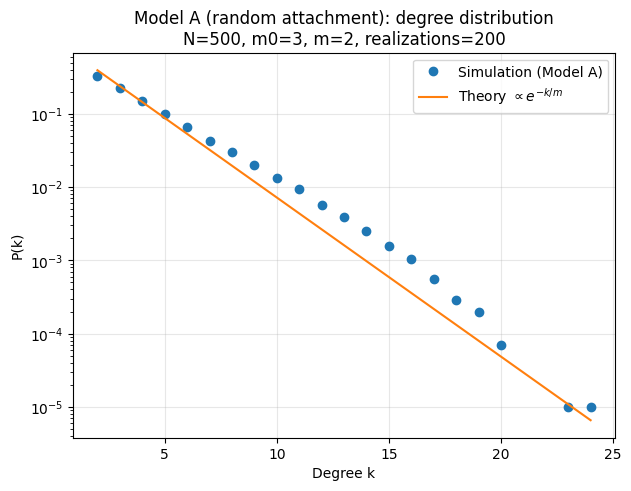

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


def random_attachment_graph(N, m0=3, m=2, seed=None):
    if seed is not None:
        random.seed(seed)

    if m0 < 1:
        raise ValueError("m0 must be at least 1.")
    if m < 1 or m > m0:
        raise ValueError("m must satisfy 1 <= m <= m0.")
    if N <= m0:
        raise ValueError("N must be greater than m0.")

    # adjacency list
    graph = [set() for _ in range(N)]

    # initial complete graph on nodes 0..m0-1
    for i in range(m0):
        for j in range(i + 1, m0):
            graph[i].add(j)
            graph[j].add(i)

    # grow the network
    for new_node in range(m0, N):
        # choose m distinct older nodes uniformly at random
        existing_nodes = list(range(new_node))
        targets = set(random.sample(existing_nodes, m))

        for t in targets:
            graph[new_node].add(t)
            graph[t].add(new_node)

    return graph

def averaged_degree_distribution_random_model(
    N=200, m0=3, m=2, realizations=100, seed=None
):
    if seed is not None:
        random.seed(seed)

    degree_counter = Counter()

    for r in range(realizations):
        g = random_attachment_graph(N, m0=m0, m=m)
        degrees = [len(neigh) for neigh in g]
        degree_counter.update(degrees)

    # convert to probabilities P(k)
    total_nodes = realizations * N
    ks = sorted(degree_counter.keys())
    P_emp = np.array([degree_counter[k] / total_nodes for k in ks])

    return np.array(ks), P_emp


N = 500
m0 = 3
m = 2
realizations = 200

ks, P_emp = averaged_degree_distribution_random_model(
    N=N, m0=m0, m=m, realizations=realizations, seed=42
)

# theoretical exponential: P(k) - exp(-k/m)
# normalize so that sum P_th over observed ks - 1
P_th_unnorm = np.exp(-ks / m)
P_th = P_th_unnorm / P_th_unnorm.sum()

plt.figure(figsize=(7, 5))

# semilog-y plot (exponential should be a straight line)
plt.semilogy(ks, P_emp, "o", label="Simulation (Model A)")
plt.semilogy(ks, P_th, "-", label=r"Theory $\propto e^{-k/m}$")

plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.title(
    f"Model A (random attachment): degree distribution\n"
    f"N={N}, m0={m0}, m={m}, realizations={realizations}"
)
plt.legend()
plt.grid(alpha=0.3)

plt.show()



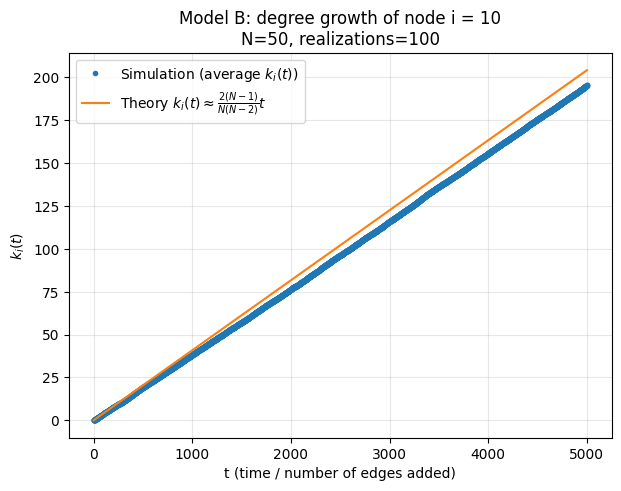

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt


def simulate_modelB_ki_vs_t(N=50, T=5000, node_i=0, realizations=50, seed=None):
    if seed is not None:
        random.seed(seed)

    if not (0 <= node_i < N):
        raise ValueError("node_i must be in [0, N).")

    # To store sum of degrees of node_i at each time
    sum_degrees = np.zeros(T, dtype=float)

    for r in range(realizations):
        # Degrees of all vertices, initially 0
        degrees = [0] * N

        # (Optional) add one initial edge so degrees are not all zero
        u0, v0 = 0, 1
        degrees[u0] += 1
        degrees[v0] += 1

        # Time t = 1 edge added already; we will record from t = 1..T
        for t in range(T):
            # Build degree_list for preferential attachment
            total_degree = sum(degrees)

            if total_degree == 0:
                # fallback: choose first endpoint uniformly if all degrees are zero
                u = random.randrange(N)
            else:
                degree_list = []
                for v in range(N):
                    degree_list.extend([v] * degrees[v])
                u = random.choice(degree_list)

            # Second endpoint chosen uniformly at random, different from u
            v = u
            while v == u:
                v = random.randrange(N)

            # Add edge (we ignore multiple edges vs simple graph; only degrees matter here)
            degrees[u] += 1
            degrees[v] += 1

            # Record degree of node_i at time t
            sum_degrees[t] += degrees[node_i]

    # Average over realizations
    k_avg = sum_degrees / realizations

    # Times 1..T (we treat t as step index / number of edges added)
    t_values = np.arange(1, T + 1)

    # Theoretical prediction: k_i(t) ≈ 2(N-1)/(N(N-2)) * t
    # and for large N, ≈ 2t/N
    if N > 2:
        k_theory = 2 * (N - 1) / (N * (N - 2)) * t_values
    else:
        k_theory = 2 / N * t_values  # degenerate case

    return t_values, k_avg, k_theory



N = 50
T = 5000
node_i = 10
realizations = 100

t_vals, k_avg, k_th = simulate_modelB_ki_vs_t(
    N=N,
    T=T,
    node_i=node_i,
    realizations=realizations,
    seed=42
)

plt.figure(figsize=(7, 5))

plt.plot(t_vals, k_avg, "o", markersize=3, label="Simulation (average $k_i(t)$)")
plt.plot(t_vals, k_th, "-", label=r"Theory $k_i(t) \approx \frac{2(N-1)}{N(N-2)} t$")

plt.xlabel("t (time / number of edges added)")
plt.ylabel(r"$k_i(t)$")
plt.title(
    f"Model B: degree growth of node i = {node_i}\n"
    f"N={N}, realizations={realizations}"
)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
